In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [235]:
from library.nb_utils import save_file

ModuleNotFoundError: No module named 'library'

In [5]:
ski_data= pd.read_csv('ski_resort_data.csv')

In [7]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [9]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [11]:
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


In [66]:
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis= 1)
#come back to this in the mentor meeting

In [67]:
missing.columns= ['count', '%']
missing.sort_values(by = 'count')

,count,%
Name,0,0.000000
total_chairs,0,0.000000
double,0,0.000000
triple,0,0.000000
quad,0,0.000000
fastQuads,0,0.000000
fastSixes,0,0.000000
surface,0,0.000000
trams,0,0.000000
base_elev,0,0.000000


In [16]:
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [20]:
ski_data['Name'].value_counts().head()

Crystal Mountain    2
Alyeska Resort      1
Brandywine          1
Boston Mills        1
Alpine Valley       1
Name: Name, dtype: int64

In [24]:
(ski_data['Name']+ ', '+ ski_data['Region']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
dtype: int64

In [26]:
(ski_data['Name']+ ', '+ ski_data['state']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
dtype: int64

In [28]:
ski_data[ski_data['Name']== 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [31]:
(ski_data.Region != ski_data.state).value_counts()

False    297
True      33
dtype: int64

In [33]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name: Region

In [35]:
(ski_data[ski_data.Region != ski_data.state].groupby('state')['Region'].value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

In [37]:
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

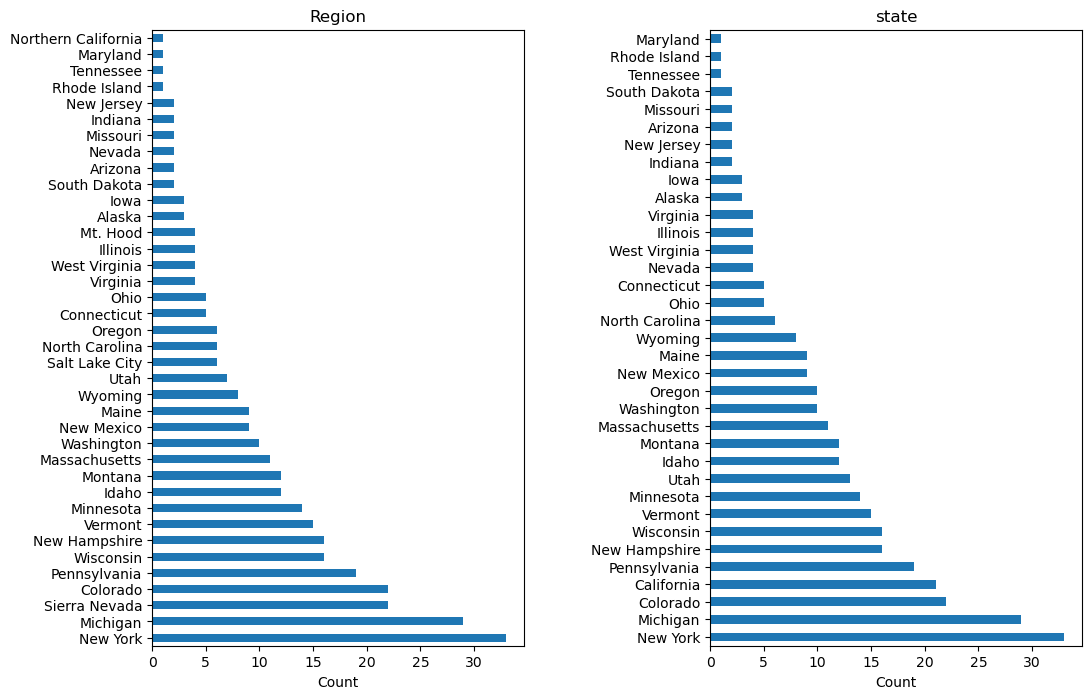

In [50]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
ski_data.Region.value_counts().plot(kind = 'barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')
ski_data.state.value_counts().plot(kind = 'barh', ax=ax[1])
ax[1].set_title('state')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace = 0.5)
#come back to this during the meeting as well 

In [54]:
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()

In [56]:
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


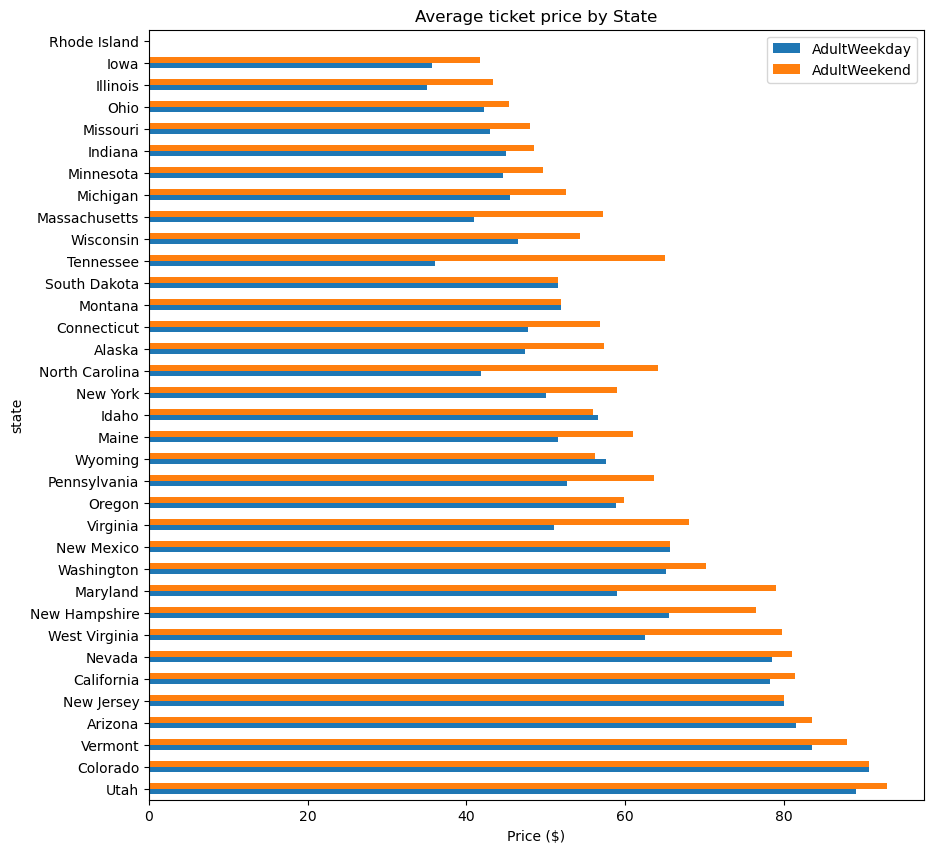

In [77]:
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

In [79]:
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']],
                        id_vars = 'state',
                        var_name = 'Ticket',
                        value_vars = ['AdultWeekday', 'AdultWeekend'],
                        value_name = 'Price')

In [81]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


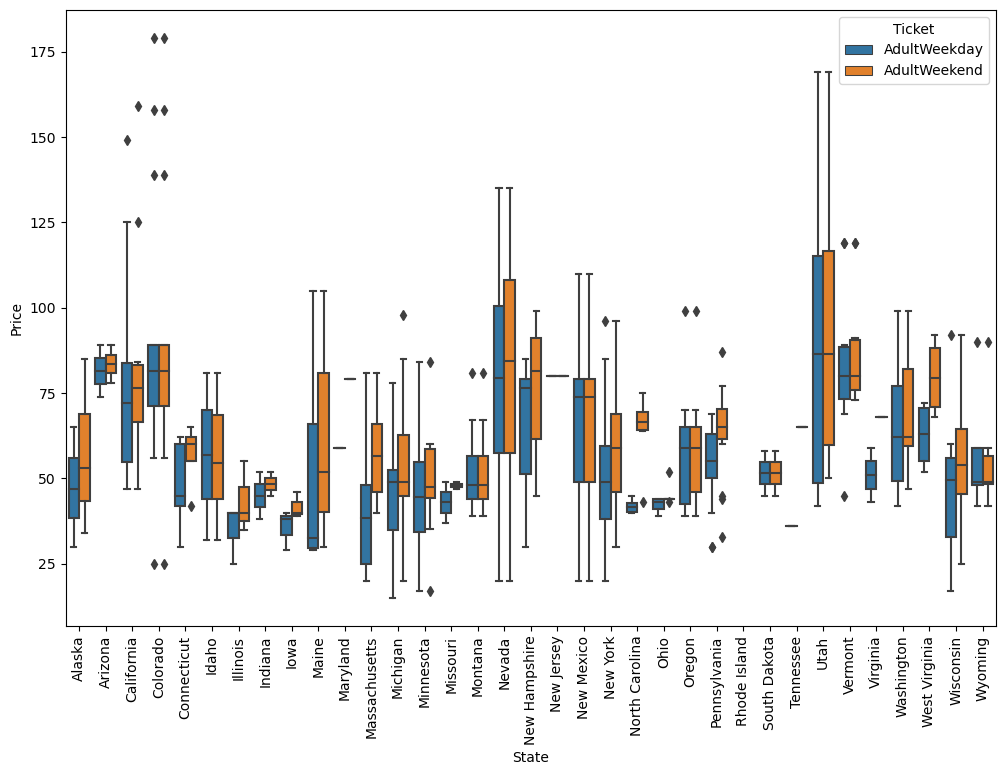

In [84]:
plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'state', y = 'Price', hue = 'Ticket', data = ticket_prices)
plt.xticks(rotation = 'vertical')
plt.xlabel('Price ($)')
plt.xlabel('State');

In [88]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


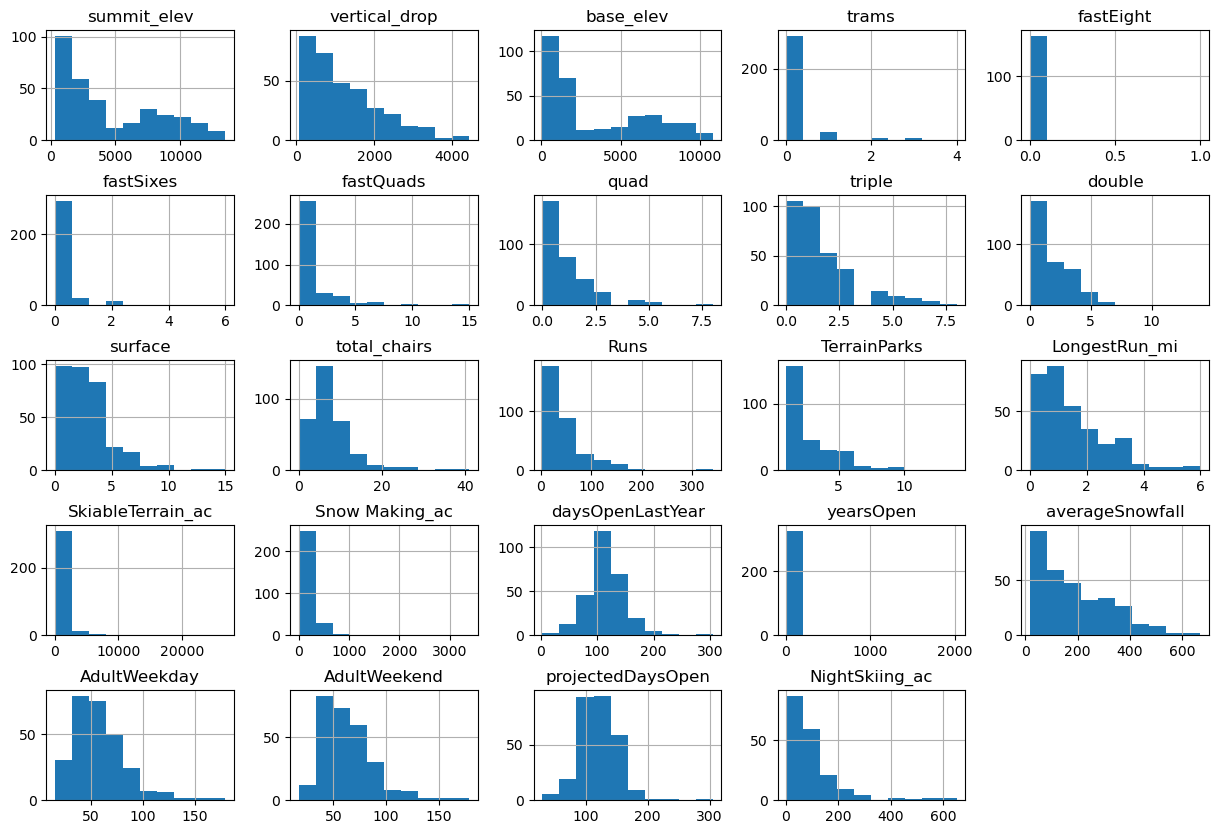

In [92]:
ski_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

In [96]:
ski_data[ski_data.SkiableTerrain_ac > 10000]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0.0,0,0,...,1.5,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN


In [98]:
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


In [100]:
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [102]:
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [104]:
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

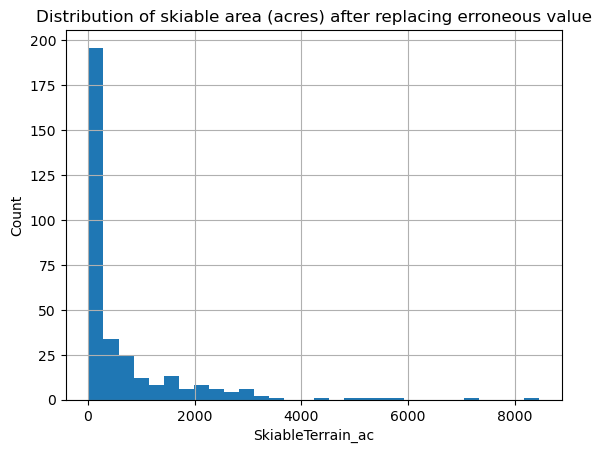

In [106]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

In [108]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]


11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [110]:
ski_data[ski_data['Snow Making_ac'] > 3000].T


,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


In [112]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [124]:
ski_data.drop(columns = 'fastEight', inplace = True)


KeyError: "['fastEight'] not found in axis"

In [126]:
ski_data.yearsOpen[ski_data.yearsOpen > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

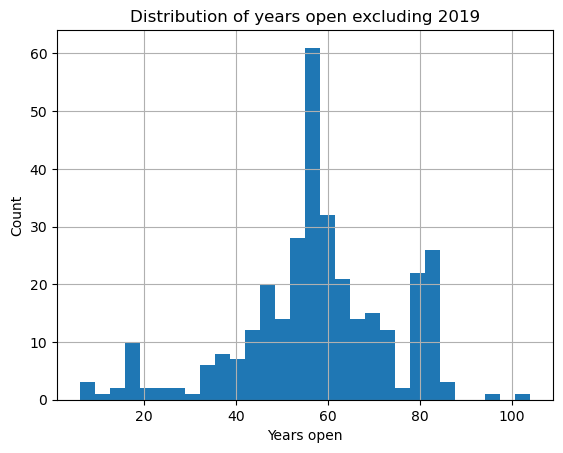

In [128]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins = 30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

In [129]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()


count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

In [131]:
ski_data = ski_data[ski_data.yearsOpen < 1000]


In [133]:
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), 
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column= 'daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks =pd.NamedAgg(column= 'TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()


,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [135]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price)* 100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

In [137]:
ski_data = ski_data[missing_price != 2]

/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_7114/1205377405.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ski_data = ski_data[missing_price != 2]


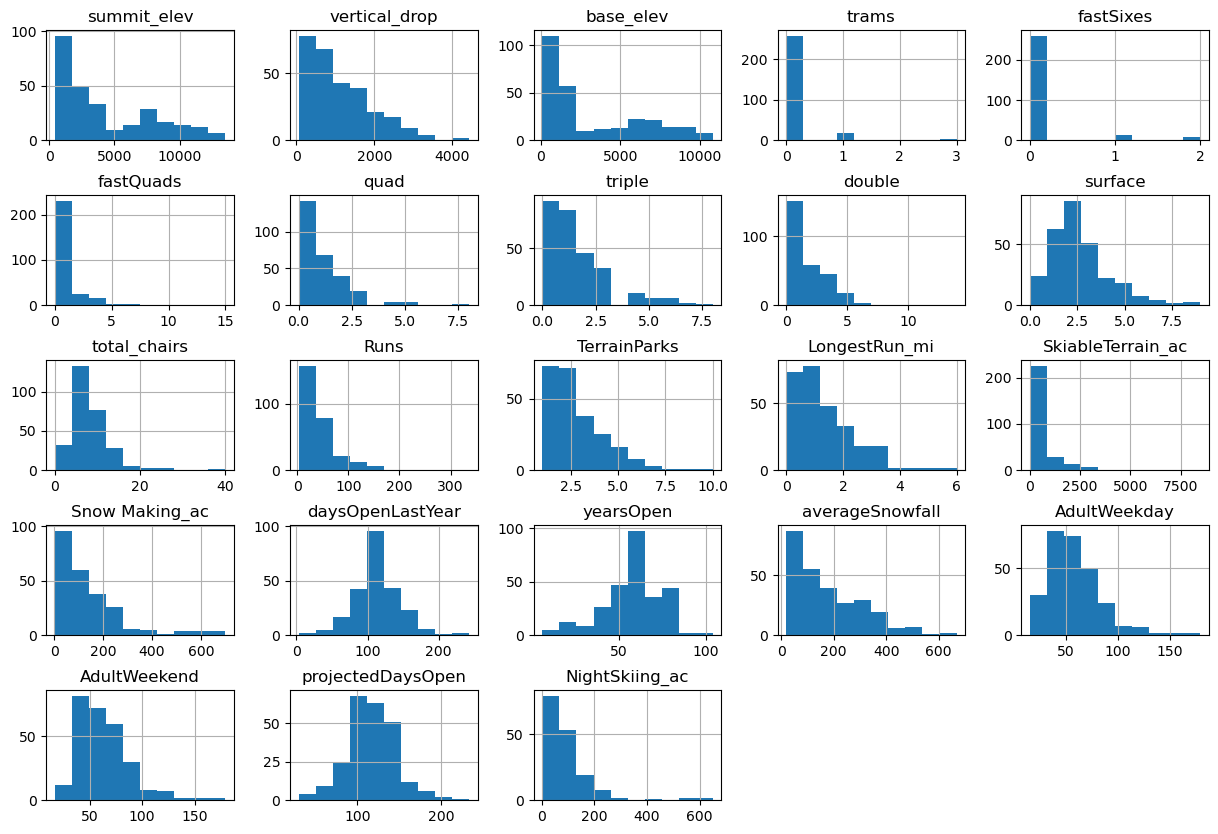

In [139]:
ski_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

In [141]:
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [143]:
type(usa_states)

list

In [159]:
len(usa_states)

50

In [160]:
usa_states

Name & postal abbs. [1]                                    Cities  \
   Name & postal abbs. [1] Name & postal abbs. [1].1         Capital   
0                  Alabama                        AL      Montgomery   
1                   Alaska                        AK          Juneau   
2                  Arizona                        AZ         Phoenix   
3                 Arkansas                        AR     Little Rock   
4               California                        CA      Sacramento   
5                 Colorado                        CO          Denver   
6              Connecticut                        CT        Hartford   
7                 Delaware                        DE           Dover   
8                  Florida                        FL     Tallahassee   
9                  Georgia                        GA         Atlanta   
10                 Hawaiʻi                        HI        Honolulu   
11                   Idaho                        ID           Boise   
12                Illinois                        IL     Springfield   
13                 Indiana                        IN    Indianapolis   
14                    Iowa                        IA      Des Moines   
15                  Kansas                        KS          Topeka   
16             Kentucky[C]                        KY       Frankfort   
17               Louisiana                        LA     Baton Rouge   
18                   Maine                        ME         Augusta   
19                Maryland                        MD       Annapolis   
20        Massachusetts[C]                        MA          Boston   
21                Michigan                        MI         Lansing   
22               Minnesota                        MN        St. Paul   
23             Mississippi                        MS         Jackson   
24                Missouri                        MO  Jefferson City   
25                 Montana                        MT          Helena   
26                Nebraska                        NE         Lincoln   
27                  Nevada                        NV     Carson City   
28           New Hampshire                        NH         Concord   
29              New Jersey                        NJ         Trenton   
30              New Mexico                        NM        Santa Fe   
31                New York                        NY          Albany   
32          North Carolina                        NC         Raleigh   
33            North Dakota                        ND        Bismarck   
34                    Ohio                        OH        Columbus   
35                Oklahoma                        OK   Oklahoma City   
36                  Oregon                        OR           Salem   
37         Pennsylvania[C]                        PA      Harrisburg   
38         Rhode Island[D]                        RI      Providence   
39          South Carolina                        SC        Columbia   
40            South Dakota                        SD          Pierre   
41               Tennessee                        TN       Nashville   
42                   Texas                        TX          Austin   
43                    Utah                        UT  Salt Lake City   
44                 Vermont                        VT      Montpelier   
45             Virginia[C]                        VA        Richmond   
46              Washington                        WA         Olympia   
47           West Virginia                        WV      Charleston   
48               Wisconsin                        WI         Madison   
49                 Wyoming                        WY        Cheyenne   

                   Established[A] Population [B][3] Total area[4]           \
        Largest[5] Established[A] Population [B][3]           mi2      km2   
0       Birmingham   Dec 14, 1819           4903185         52420   135767   
1        Anchorage    Ja

In [150]:
usa_states = usa_states[0]

KeyError: 0

In [152]:
established = usa_states.iloc[:,4]

In [154]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

In [172]:
usa_states_sub = usa_states.iloc[:,[0,5,6]].copy()

In [195]:
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [196]:
missing_states = set(state_summary.state)-set(usa_states_sub.state)
missing_states

set()

In [197]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [198]:
usa_states_sub.state.replace(to_replace='\[.*]', value='' , regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]


20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [199]:
missing_states = set(state_summary.state)-set(usa_states_sub.state)
missing_states

set()

In [202]:
state_summary = state_summary.merge(usa_states_sub, on = 'state', how = 'left')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population_x,state_area_sq_miles_x,state_population_y,state_area_sq_miles_y,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384,731545,665384,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990,7278717,113990,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695,39512223,163695,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094,5758736,104094,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543,3565278,5543,3565278,5543


<Axes: xlabel='AdultWeekday', ylabel='AdultWeekend'>

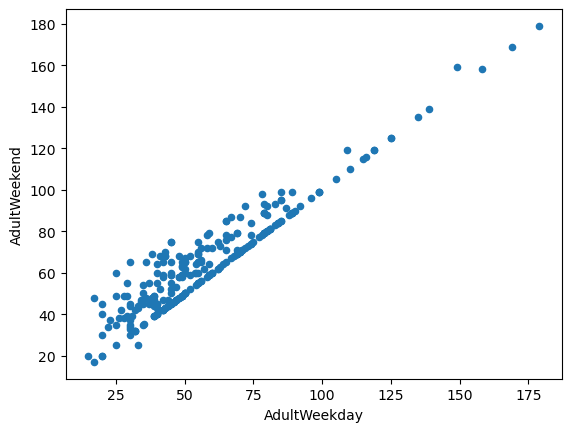

In [204]:
ski_data.plot(x ='AdultWeekday' , y='AdultWeekend' , kind = 'scatter')

In [208]:
ski_data.loc[ski_data.state == 'Montana',['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [210]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()


AdultWeekend    4
AdultWeekday    7
dtype: int64

In [219]:
ski_data.drop(columns='AdultWeekday', inplace = True)

KeyError: "['AdultWeekday'] not found in axis"

In [215]:
ski_data.dropna(subset = ['AdultWeekend'], inplace= True)

In [221]:
ski_data.shape

(277, 25)

In [223]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


In [224]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [226]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

In [228]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [248]:
ski_data.to_csv('ski_data_cleansed.csv', index = False)

In [247]:
state_summary.to_csv('state_summary.csv', index = False)

In [242]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [249]:
ski_data = pd.read_csv('ski_data_cleansed.csv')

In [251]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         277 non-null    int64  
 1   Name               277 non-null    object 
 2   Region             277 non-null    object 
 3   state              277 non-null    object 
 4   summit_elev        277 non-null    int64  
 5   vertical_drop      277 non-null    int64  
 6   base_elev          277 non-null    int64  
 7   trams              277 non-null    int64  
 8   fastSixes          277 non-null    int64  
 9   fastQuads          277 non-null    int64  
 10  quad               277 non-null    int64  
 11  triple             277 non-null    int64  
 12  double             277 non-null    int64  
 13  surface            277 non-null    int64  
 14  total_chairs       277 non-null    int64  
 15  Runs               274 non-null    float64
 16  TerrainParks       233 non

In [253]:
ski_data.head()

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [256]:
ski_data = ski_data.drop(columns = 'Unnamed: 0')

KeyError: "['Unnamed: 0'] not found in axis"

In [259]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [261]:
state_summary = pd.read_csv('state_summary.csv')

In [263]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population_x           35 non-null     int64  
 7   state_area_sq_miles_x        35 non-null     int64  
 8   state_population_y           35 non-null     int64  
 9   state_area_sq_miles_y        35 non-null     int64  
 10  state_population             35 non-null     int64  
 11  state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 3.4+ KB


In [265]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population_x,state_area_sq_miles_x,state_population_y,state_area_sq_miles_y,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384,731545,665384,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990,7278717,113990,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695,39512223,163695,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094,5758736,104094,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543,3565278,5543,3565278,5543


In [267]:
state_summary_newind = state_summary.set_index('state')


In [269]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

In [271]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

In [273]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

In [275]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

In [277]:
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ac, dtype: float64

In [279]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

In [282]:
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

AttributeError: 'DataFrame' object has no attribute 'state_population'

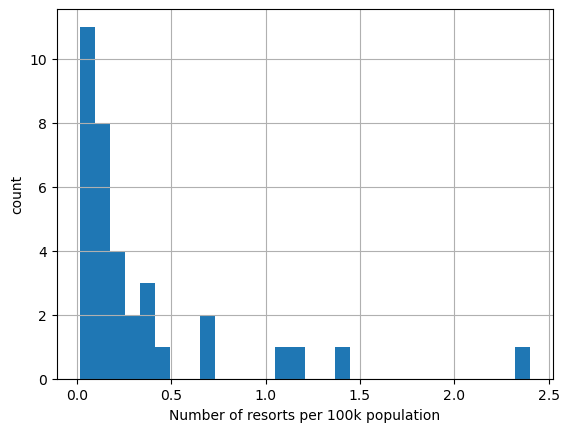

In [284]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

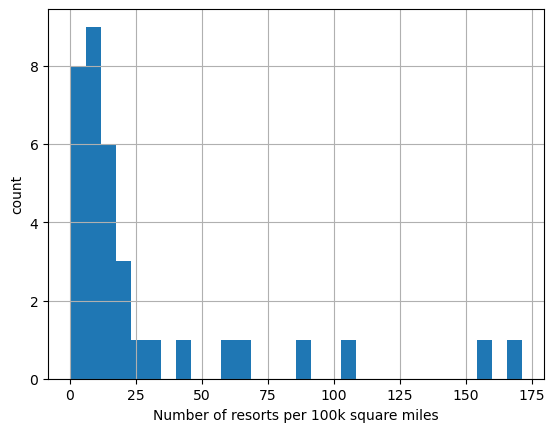

In [286]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

In [288]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [290]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

In [293]:
state_summary_scale = state_summary.set_index('state')
state_summary_index = state_summary_scale.index
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population_x,state_area_sq_miles_x,state_population_y,state_area_sq_miles_y,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,731545,665384,731545,665384,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990,7278717,113990,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,39512223,163695,39512223,163695,0.053148,12.828736
Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094,5758736,104094,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543,3565278,5543,0.140242,90.203861


In [295]:
state_summary_scale = scale(state_summary_scale)

In [297]:
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns= state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population_x,state_area_sq_miles_x,state_population_y,state_area_sq_miles_y,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,-0.820300,5.401221,-0.820300,5.401221,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,0.102401,0.311031,0.102401,0.311031,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,4.645110,0.769883,4.645110,0.769883,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,-0.111812,0.219676,-0.111812,0.219676,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.420939,-0.690097,-0.420939,-0.690097,-0.413557,1.504408


In [299]:
state_summary_scaled_df.mean()

resorts_per_state              1.189525e-17
state_total_skiable_area_ac   -1.982541e-17
state_total_days_open          1.744636e-17
state_total_terrain_parks      1.903239e-17
state_total_nightskiing_ac    -3.489272e-17
state_population_x            -1.586033e-17
state_area_sq_miles_x          1.110223e-17
state_population_y            -1.586033e-17
state_area_sq_miles_y          1.110223e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        3.172066e-17
dtype: float64

In [301]:
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
state_population_x             1.014599
state_area_sq_miles_x          1.014599
state_population_y             1.014599
state_area_sq_miles_y          1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

In [303]:
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
state_population_x             1.0
state_area_sq_miles_x          1.0
state_population_y             1.0
state_area_sq_miles_y          1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

In [305]:
state_pca = PCA().fit(state_summary_scale)

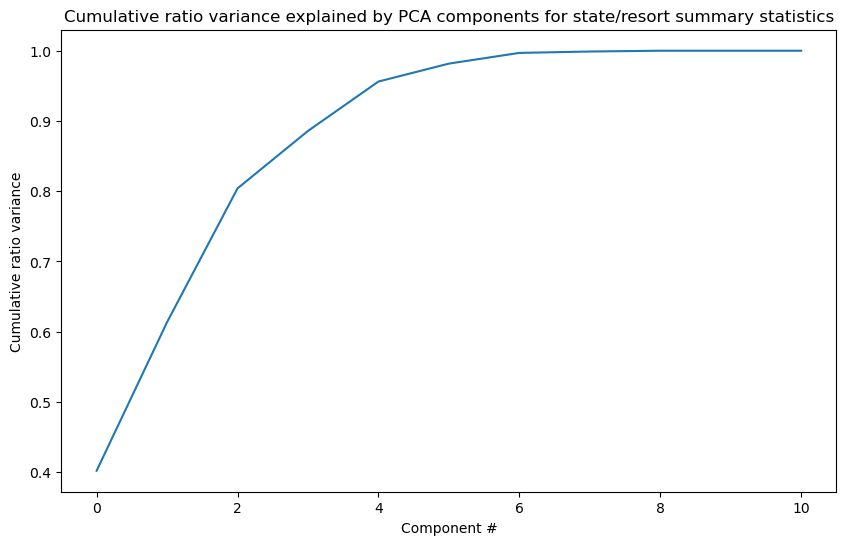

In [307]:
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative ratio variance explained by PCA components for state/resort summary statistics');

In [311]:
state_pca_x = state_pca.transform(state_summary_scale)

In [313]:
state_pca_x.shape

(35, 11)

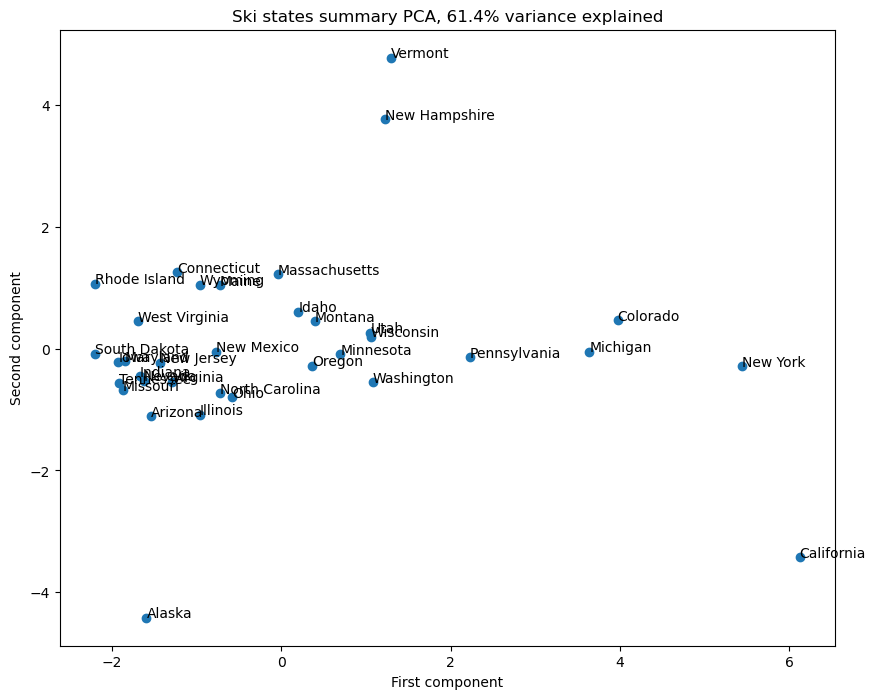

In [315]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

In [319]:
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

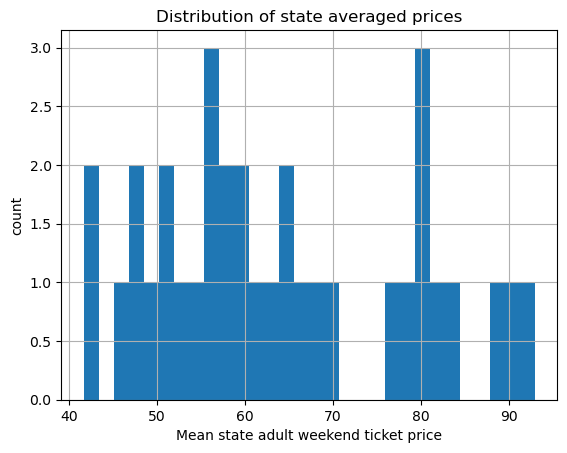

In [321]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

In [325]:
pca_df = pd.DataFrame({'PC1': state_pca_x[:,0], 'PC2': state_pca_x[:,1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.591963,-4.417037
Arizona,-1.540867,-1.111742
California,6.123505,-3.426255
Colorado,3.973620,0.460846
Connecticut,-1.231865,1.254077


In [327]:
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [330]:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [332]:
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend,AdultWeekend
state,,,,
Alaska,-1.591963,-4.417037,57.333333,57.333333
Arizona,-1.540867,-1.111742,83.500000,83.500000
California,6.123505,-3.426255,81.416667,81.416667
Colorado,3.973620,0.460846,90.714286,90.714286
Connecticut,-1.231865,1.254077,56.800000,56.800000


In [343]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q = 4, precision = 1
                )

ValueError: Input array must be 1 dimensional

In [339]:
pca_df.head()

,PC1,PC2,AdultWeekend,AdultWeekend
state,,,,
Alaska,-1.591963,-4.417037,57.333333,57.333333
Arizona,-1.540867,-1.111742,83.500000,83.500000
California,6.123505,-3.426255,81.416667,81.416667
Colorado,3.973620,0.460846,90.714286,90.714286
Connecticut,-1.231865,1.254077,56.800000,56.800000


In [340]:
pca_df.dtypes

PC1             float64
PC2             float64
AdultWeekend    float64
AdultWeekend    float64
dtype: object